In [13]:

import numpy as np  
import matplotlib.pyplot as plt 

E = -70 
Rm = 10 
tau = 10 
V_th = - 54 
V_reset = - 80

In [ ]:
T = 500.0  
dt = 0.1  
t_steps = int(T/dt) 
time = np.arange(0, 500, dt)

current_value = 1.7

# 4. Define the current injection
def inject_current(t, current_value):
    if 100 <= t < 400: 
        return current_value  
    else:
        return 0.0

In [61]:
def simulate_neuron(current_value):
    V = np.zeros(len(time))
    spikes = np.zeros(t_steps) 
    V[0] = E 
    for i in range(1, len(time)):
        # Get current time
        t = time[i]
        
        # Get input current
        Ie = inject_current(t, current_value)
        
        # Calculate dV/dt using the differential equation
        dV_dt = (E - V[i-1] + Rm * Ie) / tau
        
        # Update V using Euler's method
        V[i] = V[i-1] + dV_dt * dt
        
        if V[i] >= V_th:
            spikes[i] = 1
            
            # Reset membrane potential
            V[i] = V_reset
    
    return V, spikes

def firing_rate_calc(Ie):
    r_isi = tau/1000 * np.log((Rm * Ie + E - V_reset) / (Rm * Ie + E - V_th))
    return 1 / r_isi


/var/folders/pj/c6v4sq5n3pn_r1qk76bj_z3c0000gn/T/ipykernel_47077/1348101108.py:27: RuntimeWarning: invalid value encountered in log
  r_isi = tau/1000 * np.log((Rm * Ie + E - V_reset) / (Rm * Ie + E - V_th))


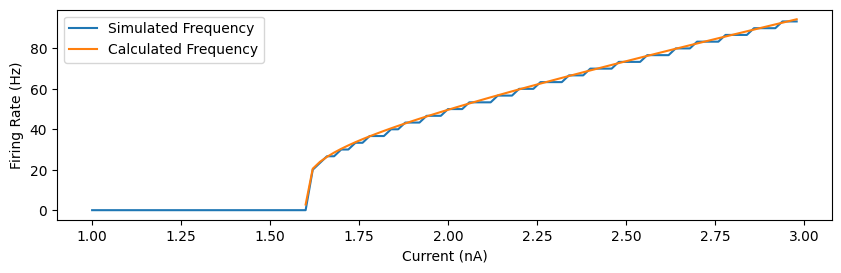

In [76]:
I_range = np.arange(1, 3, 0.02)
spike_counts = np.zeros(len(I_range))

for i in range(len(I_range)):
    current_value = I_range[i]
    _, spikes = simulate_neuron(current_value)
    spike_counts[i] = np.sum(spikes)


frequency = spike_counts / (300 / 1000)

frequency_formula = map(lambda x: firing_rate_calc(x), I_range)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(I_range, frequency, label='Simulated Frequency')
plt.plot(I_range, list(frequency_formula), label='Calculated Frequency')
plt.xlabel('Current (nA)')
plt.ylabel('Firing Rate (Hz)')
plt.legend()

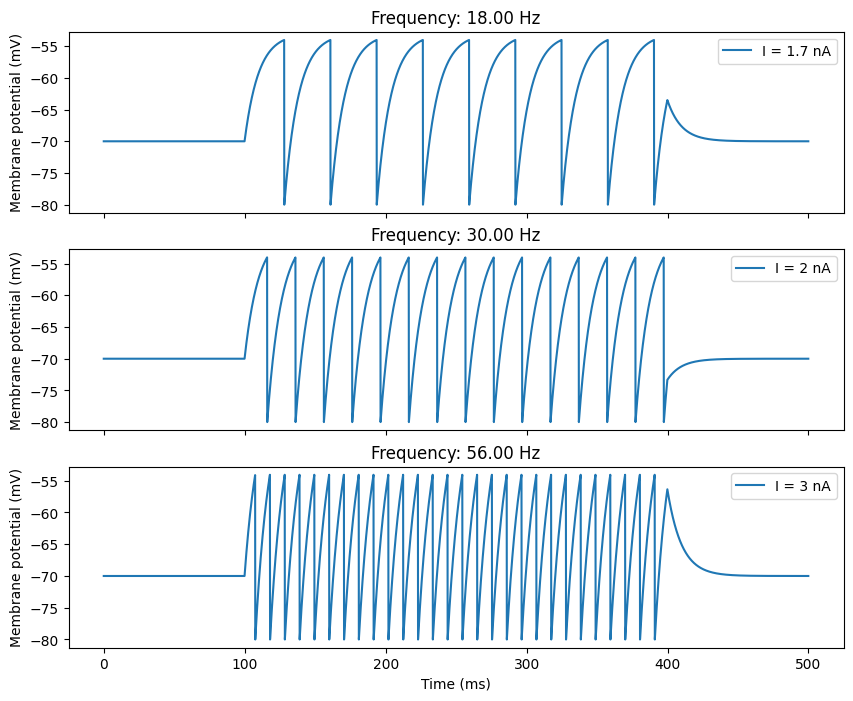

In [72]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
spike_counts = np.zeros(len(I_range))
for indx, i in enumerate([1.7, 2, 3]):
    V, spikes = simulate_neuron(i)
    spike_counts[indx] = np.sum(spikes)
    frequency = spike_counts[indx] / (T / 1000)
    ax[indx].plot(time, V, label=f'I = {i} nA')
    ax[indx].set_ylabel('Membrane potential (mV)')
    if indx == 2:
        ax[indx].set_xlabel('Time (ms)')

    ax[indx].set_title(f'Frequency: {frequency:.2f} Hz')
    ax[indx].legend()

